In [1]:
!git clone https://github.com/guyuxuan9/MML_coursework.git

Cloning into 'MML_coursework'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 116 (delta 27), reused 54 (delta 15), pack-reused 43 (from 1)
Receiving objects: 100% (116/116), 82.03 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (35/35), done.


Dimension 9:
  Average MI per feature: 0.0017
  Average MI of non-zero features: 0.0031
  Number of non-zero MI features: 5
  Number of zero MI features: 4

Dimension 12:
  Average MI per feature: 0.0011
  Average MI of non-zero features: 0.0020
  Number of non-zero MI features: 7
  Number of zero MI features: 5

Dimension 15:
  Average MI per feature: 0.0013
  Average MI of non-zero features: 0.0020
  Number of non-zero MI features: 10
  Number of zero MI features: 5

Dimension 18:
  Average MI per feature: 0.0018
  Average MI of non-zero features: 0.0029
  Number of non-zero MI features: 11
  Number of zero MI features: 7

Dimension 24:
  Average MI per feature: 0.0006
  Average MI of non-zero features: 0.0012
  Number of non-zero MI features: 11
  Number of zero MI features: 13

Dimension 30:
  Average MI per feature: 0.0009
  Average MI of non-zero features: 0.0019
  Number of non-zero MI features: 14
  Number of zero MI features: 16

Dimension 45:
  Average MI per feature: 0.0005


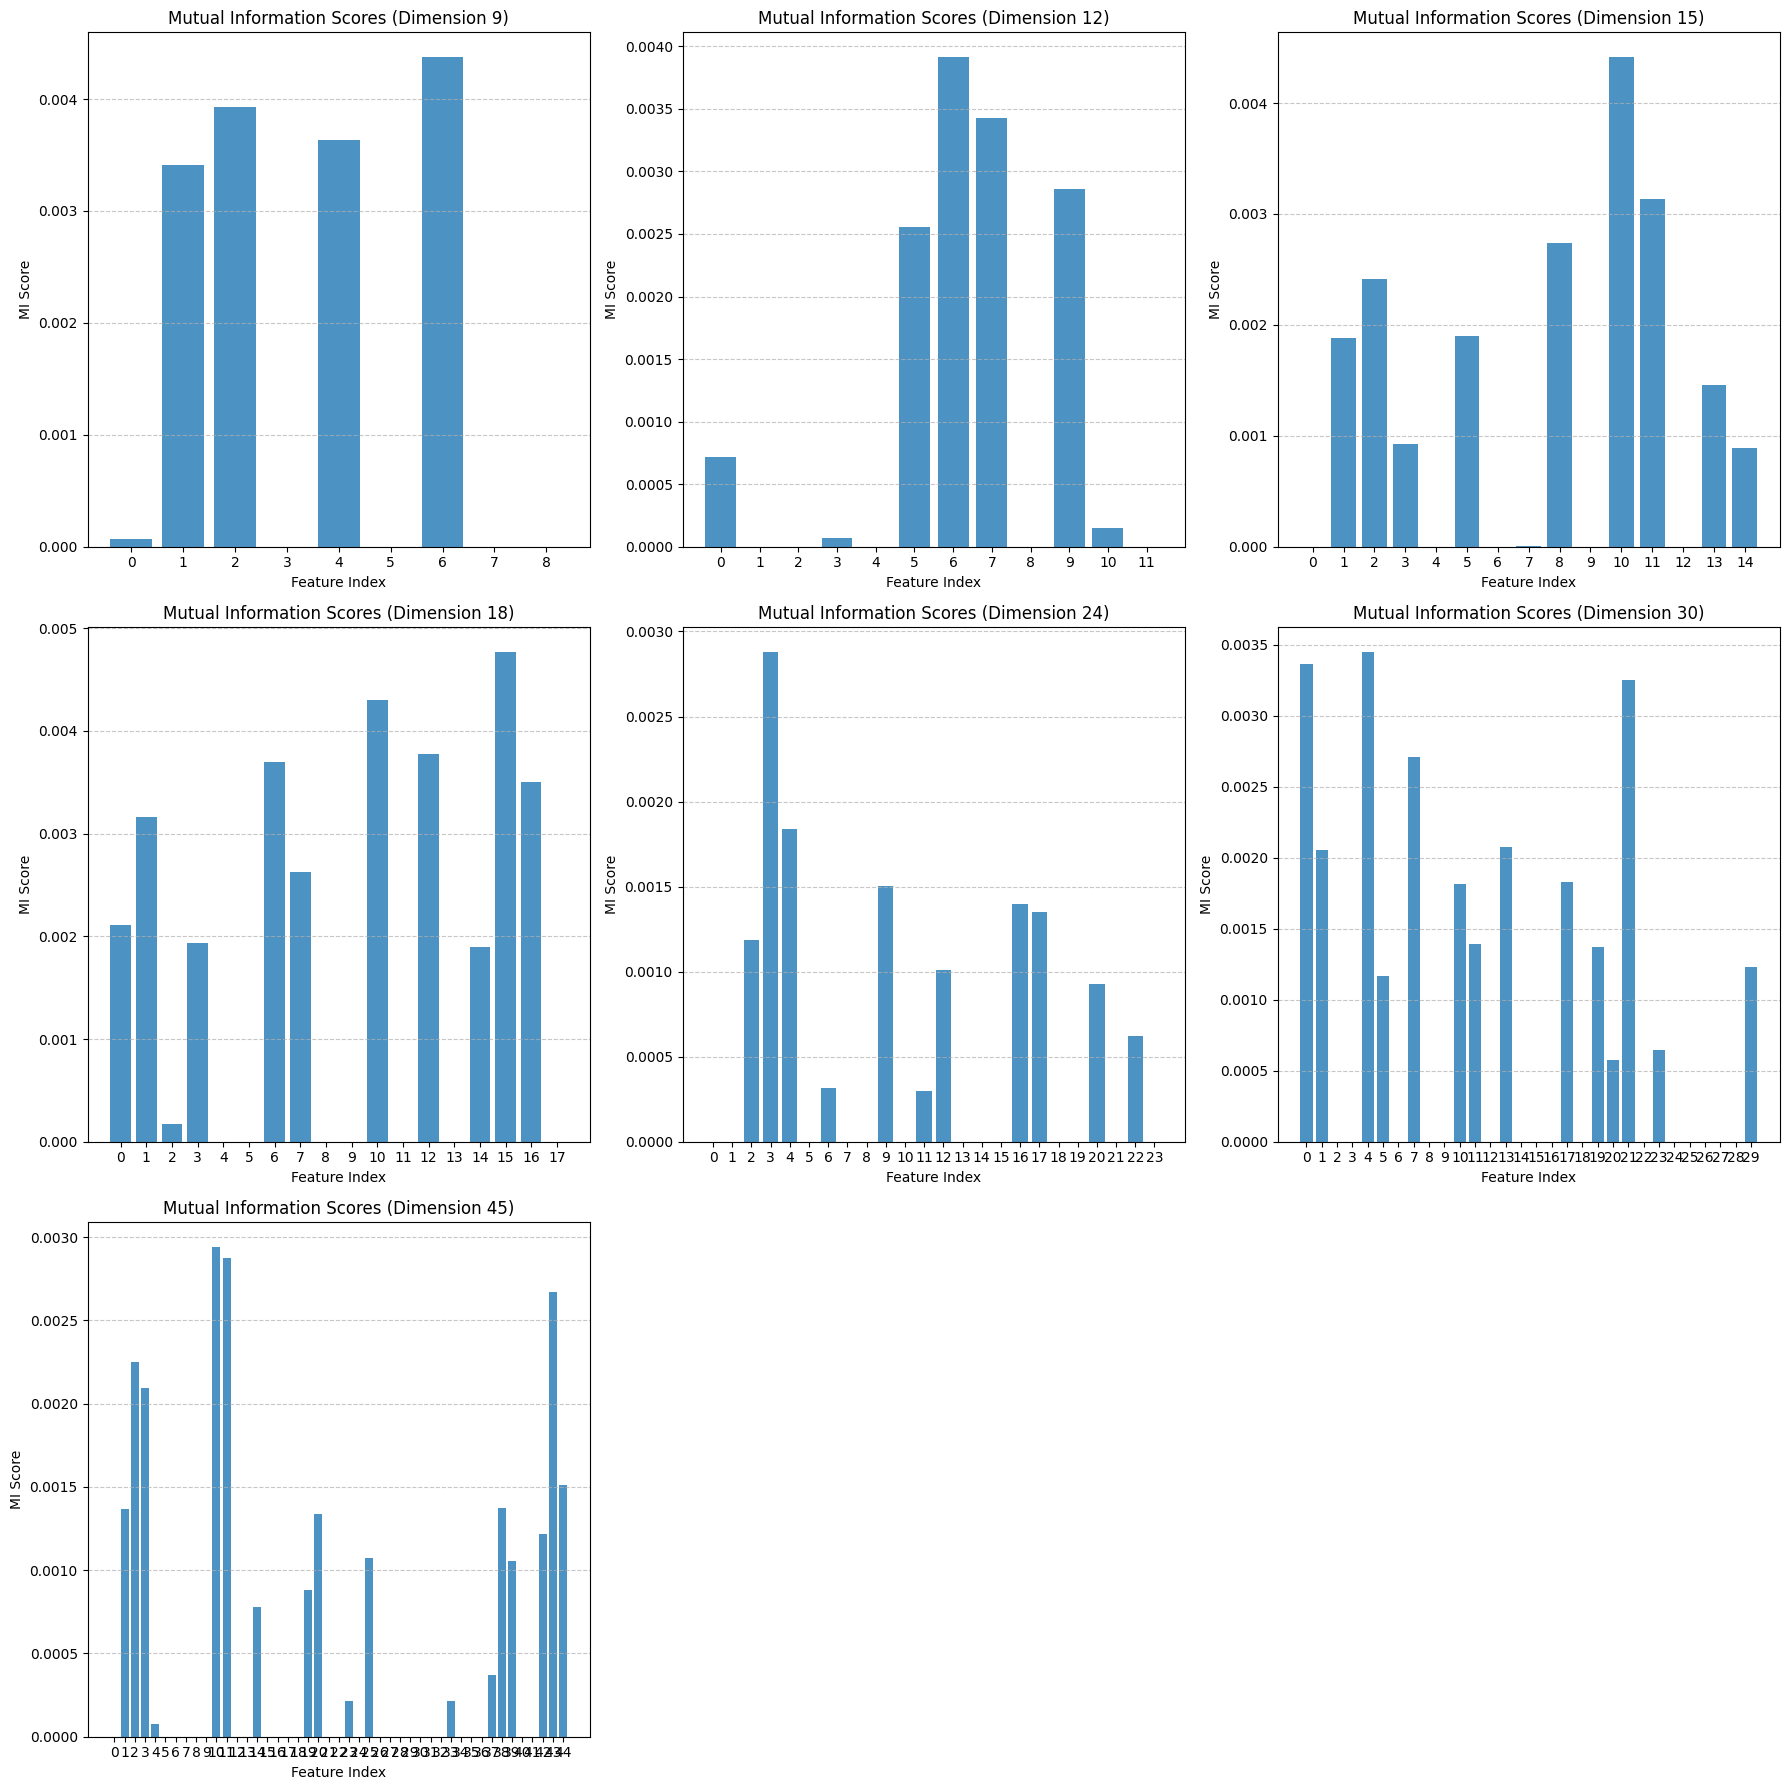

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# List of file dimensions
dims = [9, 12, 15, 18, 24, 30, 45]

# Dictionary to store MI scores and data for reuse
data_dict = {}
mi_scores_dict = {}

# Precompute MI scores and store data for each dimension
for dim in dims:
    # Load the datasets
    X = np.load(f'MML_coursework/Datasets/kryptonite-{dim}-X.npy')
    y = np.load(f'MML_coursework/Datasets/kryptonite-{dim}-y.npy')

    # Compute mutual information scores
    mi_scores = mutual_info_classif(X, y, discrete_features='auto')

    # Store data and MI scores
    data_dict[dim] = (X, y)
    mi_scores_dict[dim] = mi_scores

    # Calculate statistics
    avg_info = np.mean(mi_scores)
    non_zero_features = np.sum(mi_scores > 0)
    zero_features = np.sum(mi_scores == 0)
    avg_non_zero_info = np.mean(mi_scores[mi_scores > 0]) if non_zero_features > 0 else 0

    # Print statistics
    print(f"Dimension {dim}:")
    print(f"  Average MI per feature: {avg_info:.4f}")
    print(f"  Average MI of non-zero features: {avg_non_zero_info:.4f}")
    print(f"  Number of non-zero MI features: {non_zero_features}")
    print(f"  Number of zero MI features: {zero_features}")
    print()

# Function to plot MI scores with customisable settings
def plot_mi_scores(mi_scores_dict, dims, bar_width=0.8):
    n_dims = len(dims)
    n_columns = 3  # Number of columns for subplots
    n_rows = (n_dims + n_columns - 1) // n_columns  # Calculate the number of rows needed

    # Create a larger figure for subplots
    plt.figure(figsize=(18, n_rows * 6))

    for i, dim in enumerate(dims):
        plt.subplot(n_rows, n_columns, i + 1)
        mi_scores = mi_scores_dict[dim]
        plt.bar(range(len(mi_scores)), mi_scores, width=bar_width, alpha=0.8)
        plt.xlabel('Feature Index')
        plt.ylabel('MI Score')
        plt.title(f'Mutual Information Scores (Dimension {dim})')
        plt.xticks(range(len(mi_scores)))
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Plot the MI scores
plot_mi_scores(mi_scores_dict, dims)


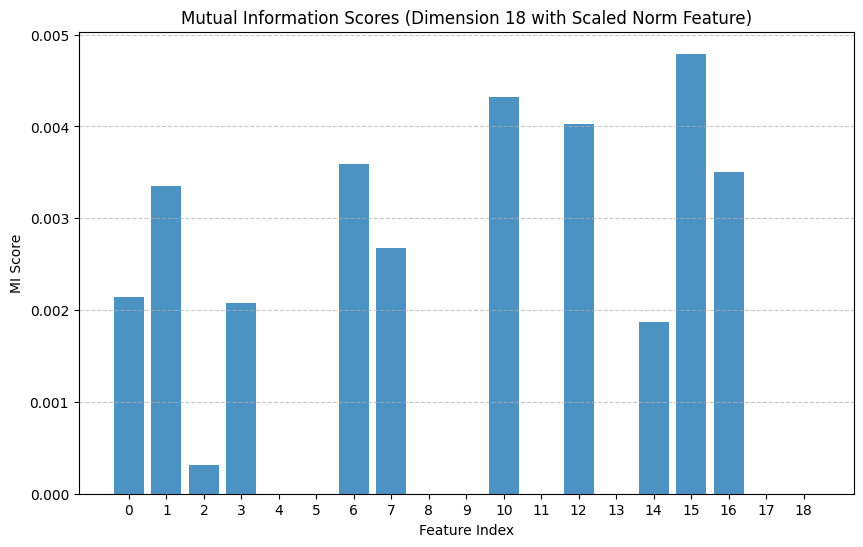

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

# Load the dataset for dimension 18
dim = 18
X = np.load(f'MML_coursework/Datasets/kryptonite-{dim}-X.npy')
y = np.load(f'MML_coursework/Datasets/kryptonite-{dim}-y.npy')

# Compute the norm of X
norms = np.linalg.norm(X, axis=1).reshape(-1, 1)

# Concatenate the norm feature to X
X_with_norms = np.concatenate([X, norms], axis=1)

# Standard scale all features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_with_norms)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Compute mutual information scores
mi_scores = mutual_info_classif(X_scaled, y, discrete_features='auto')

# Plot MI scores for dimension 18
plt.figure(figsize=(10, 6))
plt.bar(range(len(mi_scores)), mi_scores, alpha=0.8)
plt.xlabel('Feature Index')
plt.ylabel('MI Score')
plt.title(f'Mutual Information Scores (Dimension {dim} with Scaled Norm Feature)')
plt.xticks(range(len(mi_scores)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


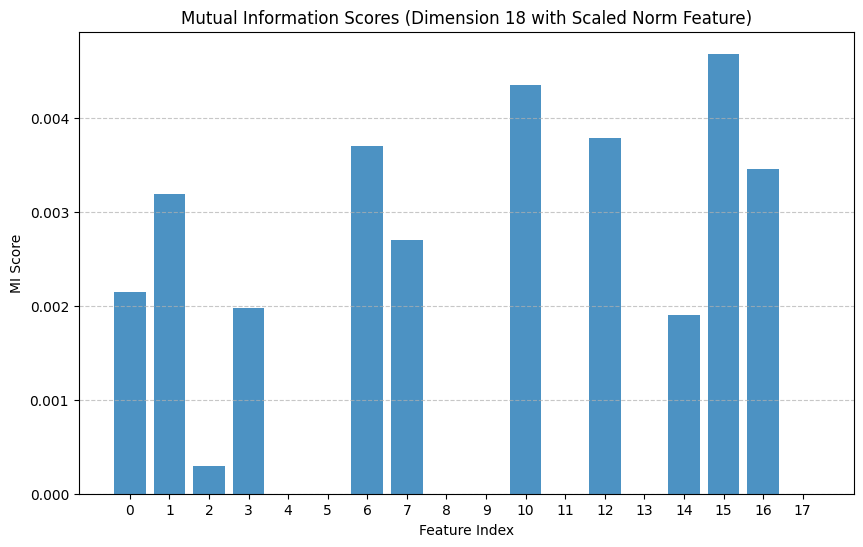

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

# Load the dataset for dimension 18
dim = 18
X = np.load(f'MML_coursework/Datasets/kryptonite-{dim}-X.npy')
y = np.load(f'MML_coursework/Datasets/kryptonite-{dim}-y.npy')

# Compute the norm of X
norms = np.linalg.norm(X, axis=1).reshape(-1, 1)

# Concatenate the norm feature to X
X_with_norms = np.concatenate([X, norms], axis=1)




# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Plot MI scores for dimension 18
plt.figure(figsize=(10, 6))
plt.bar(range(len(mi_scores)), mi_scores, alpha=0.8)
plt.xlabel('Feature Index')
plt.ylabel('MI Score')
plt.title(f'Mutual Information Scores (Dimension {dim} with Scaled Norm Feature)')
plt.xticks(range(len(mi_scores)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


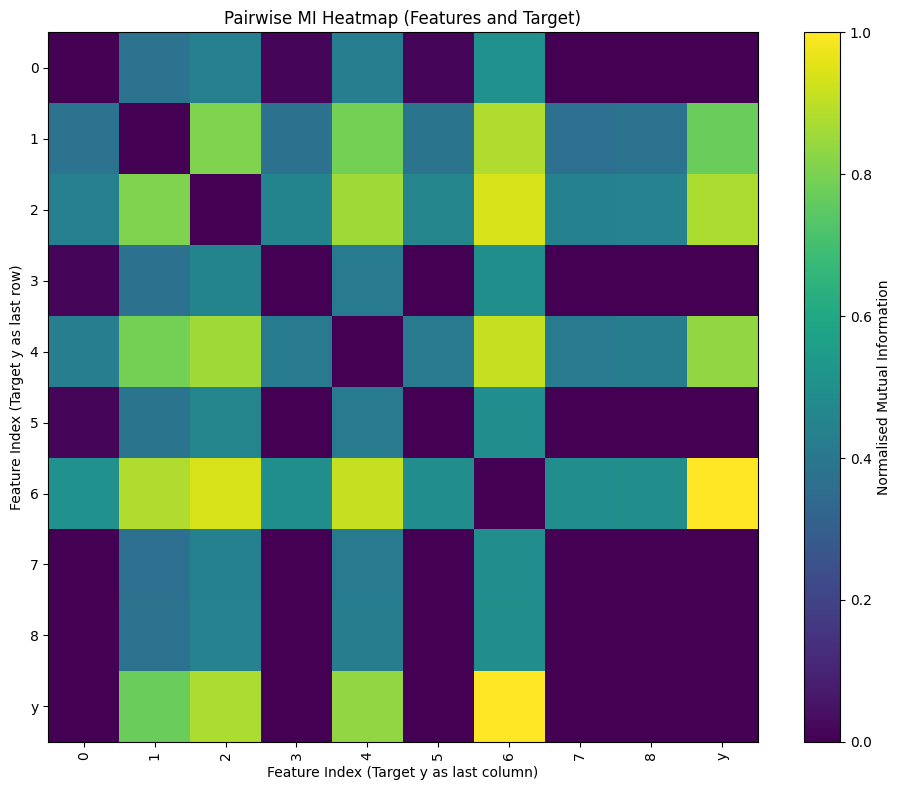

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from itertools import combinations

# Load the dataset for dimension d=9
X = np.load('MML_coursework/Datasets/kryptonite-9-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-9-y.npy')

# Number of features
n_features = X.shape[1]

# Create an empty matrix to store pairwise MI scores (n_features + 1 to include target y)
mi_matrix = np.zeros((n_features + 1, n_features + 1))

# Compute pairwise mutual information
for combo in combinations(range(n_features), 2):
    X_pair = X[:, list(combo)]
    mi_score = mutual_info_classif(X_pair, y)
    avg_mi = np.mean(mi_score)

    # Store the average MI in the matrix
    mi_matrix[combo[0], combo[1]] = avg_mi
    mi_matrix[combo[1], combo[0]] = avg_mi  # Symmetric matrix

# Compute MI between each feature and the target y
mi_with_y = mutual_info_classif(X, y)

# Add MI scores with y to the matrix (last row and column)
mi_matrix[:-1, -1] = mi_with_y  # Last column for MI with y
mi_matrix[-1, :-1] = mi_with_y  # Last row for MI with y

# Normalise the MI matrix (0 to 1)
mi_matrix_normalised = (mi_matrix - mi_matrix.min()) / (mi_matrix.max() - mi_matrix.min())

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(mi_matrix_normalised, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Normalised Mutual Information')

# Annotate heatmap
plt.title('Pairwise MI Heatmap (Features and Target)')
plt.xlabel('Feature Index (Target y as last column)')
plt.ylabel('Feature Index (Target y as last row)')
plt.xticks(range(n_features + 1), labels=list(range(n_features)) + ['y'], rotation=90)
plt.yticks(range(n_features + 1), labels=list(range(n_features)) + ['y'])
plt.grid(False)  # Optional, removes grid lines
plt.tight_layout()
plt.show()


## Removing features from X that have non-zero Mutual Information with Y prevents us from learning

#### Works for NN with all features

Training set: (12600, 9) (12600,)
Validation set: (2700, 9) (2700,)
Test set: (2700, 9) (2700,)
Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 45s 79ms/step - accuracy: 0.5532 - loss: 0.6925 - val_accuracy: 0.6489 - val_loss: 0.6904
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6956 - loss: 0.6885 - val_accuracy: 0.6411 - val_loss: 0.6856
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7531 - loss: 0.6810 - val_accuracy: 0.7570 - val_loss: 0.6726
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.6627 - val_accuracy: 0.7852 - val_loss: 0.6391
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8162 - loss: 0.6163 - val_accuracy: 0.8381 - val_loss: 0.5508
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8582 - loss: 0.5082 - val_accuracy: 0.9126 - val_loss: 0.4041
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.3626 - val_accuracy: 0.9259 - val_loss: 0.3015
Epoch 

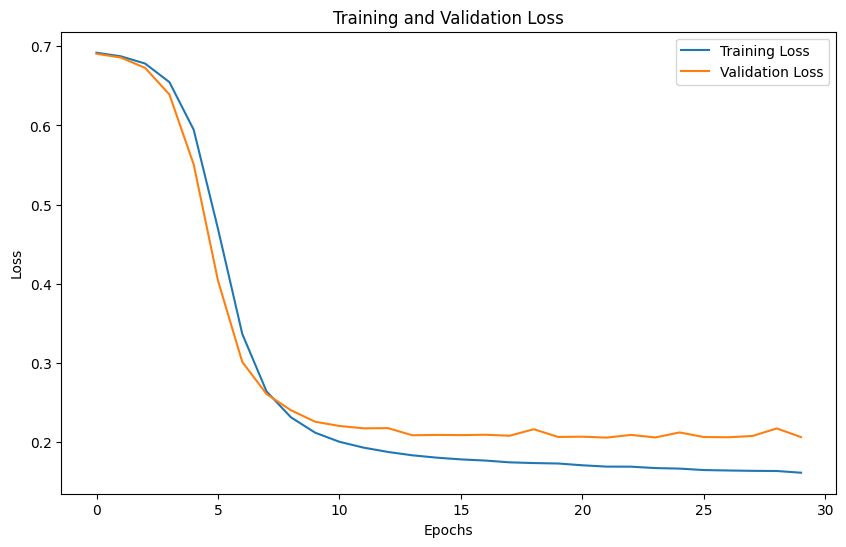

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9573 - loss: 0.1808
Test Loss: 0.1744, Test Accuracy: 0.9589


In [ ]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-9-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-9-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=45, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#### Fail with dropping features with non-zero MI with Y

Training set: (12600, 4) (12600,)
Validation set: (2700, 4) (2700,)
Test set: (2700, 4) (2700,)
Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.5041 - val_loss: 0.6931
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5108 - loss: 0.6931 - val_accuracy: 0.5007 - val_loss: 0.6932
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5107 - loss: 0.6930 - val_accuracy: 0.4937 - val_loss: 0.6934
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5051 - loss: 0.6930 - val_accuracy: 0.5048 - val_loss: 0.6935
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.4985 - val_loss: 0.6933
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5047 - loss: 0.6930 - val_accuracy: 0.4985 - val_loss: 0.6934
E

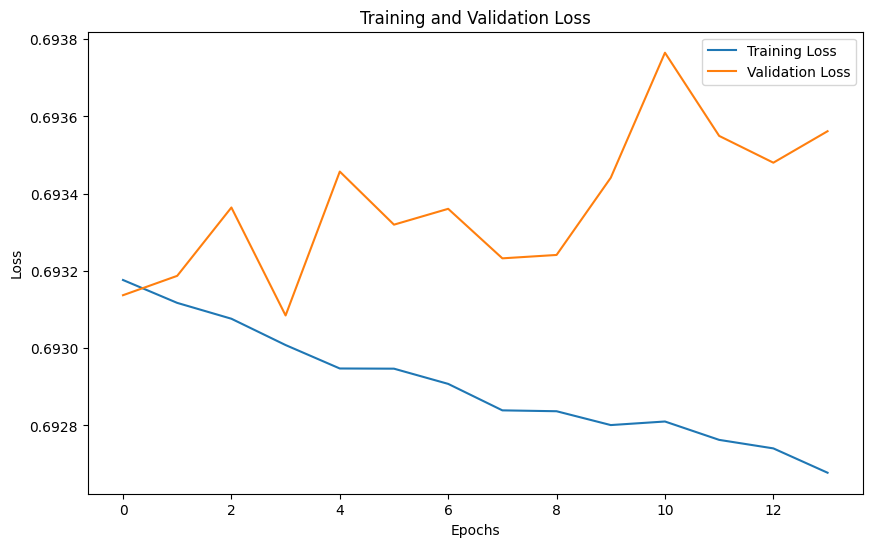

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5021 - loss: 0.6930
Test Loss: 0.6930, Test Accuracy: 0.5019


In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data
X = np.load('MML_coursework/Datasets/kryptonite-9-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-9-y.npy')

######################################################
# Select features with non-zero mutual information
mi = mutual_info_classif(X, y)
X = X[:, mi > 0]
######################################################


# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with dense layers for binary classification
ip = tf.keras.layers.Input(shape=[X.shape[1]])
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Repeat for 18 dimensions
### Visualise features' cross-sectional mutual information

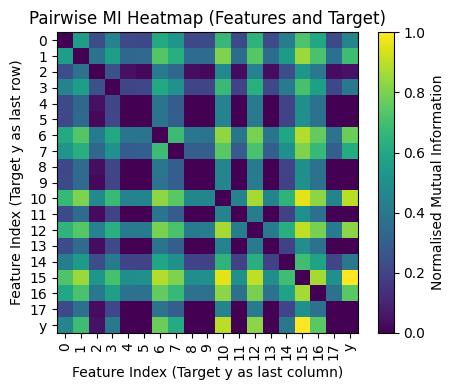

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from itertools import combinations

# Load the dataset for dimension d=9
X = np.load('MML_coursework/Datasets/kryptonite-18-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-18-y.npy')

# Number of features
n_features = X.shape[1]

# Create an empty matrix to store pairwise MI scores (n_features + 1 to include target y)
mi_matrix = np.zeros((n_features + 1, n_features + 1))

# Compute pairwise mutual information
for combo in combinations(range(n_features), 2):
    X_pair = X[:, list(combo)]
    mi_score = mutual_info_classif(X_pair, y)
    avg_mi = np.mean(mi_score)

    # Store the average MI in the matrix
    mi_matrix[combo[0], combo[1]] = avg_mi
    mi_matrix[combo[1], combo[0]] = avg_mi  # Symmetric matrix

# Compute MI between each feature and the target y
mi_with_y = mutual_info_classif(X, y)

# Add MI scores with y to the matrix (last row and column)
mi_matrix[:-1, -1] = mi_with_y  # Last column for MI with y
mi_matrix[-1, :-1] = mi_with_y  # Last row for MI with y

# Normalise the MI matrix (0 to 1)
mi_matrix_normalised = (mi_matrix - mi_matrix.min()) / (mi_matrix.max() - mi_matrix.min())

# Plot the heatmap
plt.figure(figsize=(5, 4))
plt.imshow(mi_matrix_normalised, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Normalised Mutual Information')

# Annotate heatmap
plt.title('Pairwise MI Heatmap (Features and Target)')
plt.xlabel('Feature Index (Target y as last column)')
plt.ylabel('Feature Index (Target y as last row)')
plt.xticks(range(n_features + 1), labels=list(range(n_features)) + ['y'], rotation=90)
plt.yticks(range(n_features + 1), labels=list(range(n_features)) + ['y'])
plt.grid(False)  # Optional, removes grid lines
plt.tight_layout()
plt.show()


### Drop zero MI-features (MI with y)

Using device: cuda


  2%|▏         | 1/50 [00:02<01:55,  2.35s/it]

New best model saved with test loss: 0.6936
Epoch [1/50], Train Loss: 0.6934, Train Accuracy: 50.01%, Test Loss: 0.6936, Test Accuracy: 49.54%


 22%|██▏       | 11/50 [00:26<01:33,  2.39s/it]

Epoch [11/50], Train Loss: 0.6934, Train Accuracy: 50.01%, Test Loss: 0.6936, Test Accuracy: 49.54%


 42%|████▏     | 21/50 [00:50<01:09,  2.41s/it]

Epoch [21/50], Train Loss: 0.6934, Train Accuracy: 50.01%, Test Loss: 0.6936, Test Accuracy: 49.54%


 62%|██████▏   | 31/50 [01:14<00:45,  2.40s/it]

Epoch [31/50], Train Loss: 0.6934, Train Accuracy: 50.01%, Test Loss: 0.6936, Test Accuracy: 49.54%


 82%|████████▏ | 41/50 [01:39<00:21,  2.43s/it]

Epoch [41/50], Train Loss: 0.6934, Train Accuracy: 50.01%, Test Loss: 0.6936, Test Accuracy: 49.54%


100%|██████████| 50/50 [02:00<00:00,  2.41s/it]


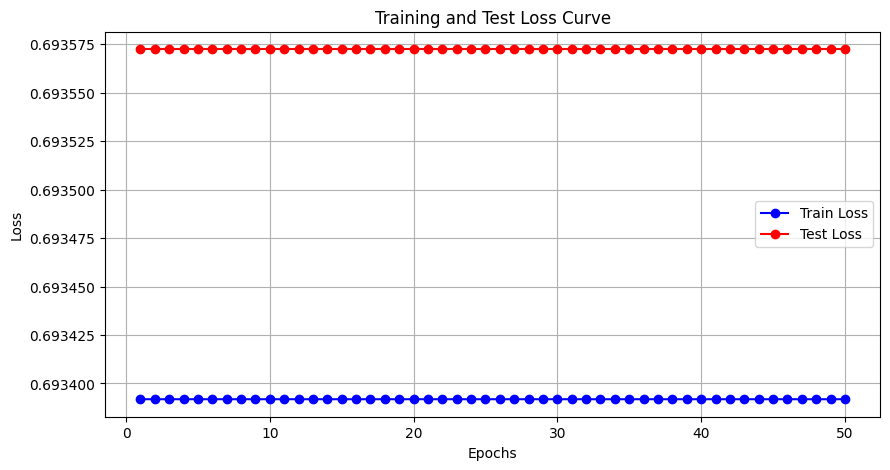

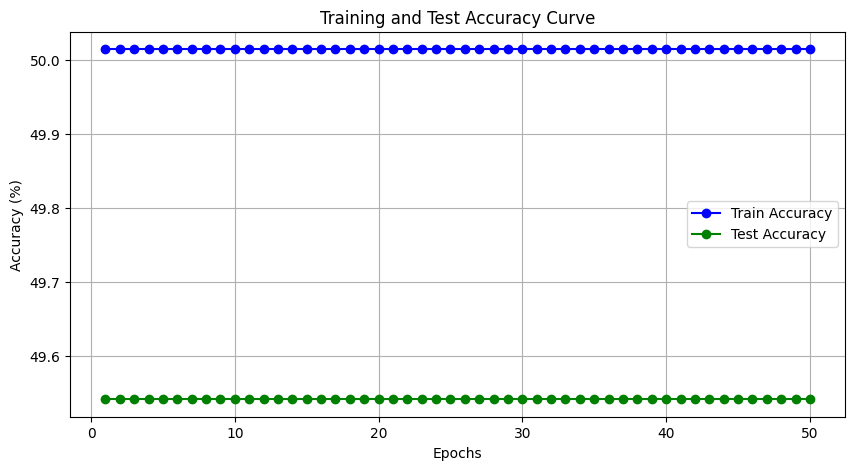

<ipython-input-8-5e9bb645591b>:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(best_model_path))


Final Test Accuracy: 49.54%
Confusion Matrix:
[[3567    0]
 [3633    0]]


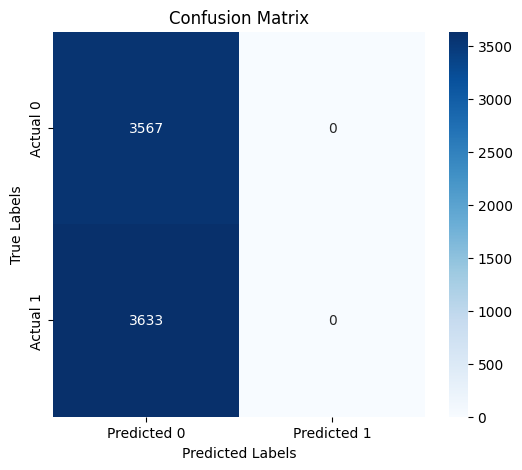

Classification Report:
              precision    recall  f1-score   support

         0.0     0.4954    1.0000    0.6626      3567
         1.0     0.0000    0.0000    0.0000      3633

    accuracy                         0.4954      7200
   macro avg     0.2477    0.5000    0.3313      7200
weighted avg     0.2454    0.4954    0.3283      7200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Import accuracy_score from sklearn
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np
from tqdm import trange  # Import trange for progress bar during training
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load the dataset for dimension d=9
X = np.load('MML_coursework/Datasets/kryptonite-18-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-18-y.npy')

# Define the Neural Network model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()

        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.LayerNorm(256)  # Add Batch Normalization
        self.fc2 = nn.Linear(256, 256)
        self.bn2 = nn.LayerNorm(256)   # Add Batch Normalization
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 1)    # Hidden layer (64 neurons) -> Output layer (1 neuron)


        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.nn.functional.gelu(self.bn1(self.fc1(x)))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.bn2(self.fc2(x)))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc3(x))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc4(x))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc5(x))  # Apply batch normalization before activation
        x = self.fc6(x)               # Output layer (logits)
        x = self.sigmoid(x)           # Sigmoid activation to get a value between 0 and 1 (binary classification)
        return x



# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)

######################################################
# Select features with non-zero mutual information
mi = mutual_info_classif(X, y)
X_mi = X[:, mi > 0]
######################################################

# Create the model instance and move it to the GPU
model = BinaryClassifier(X_mi.shape[1]).to(device)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mi, y, test_size=0.2, random_state=42)

# Standardization (zero mean, unit variance)
scaler = StandardScaler()  # Or you can use MinMaxScaler() for normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert them into PyTorch tensors (ensure float32 for targets) and move to GPU
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)  # Ensure float32 type for BCE loss

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# Create DataLoader for training and test datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Store loss values for plotting
train_losses = []
test_losses = []

# Store accuracy values for plotting
train_accuracies = []
test_accuracies = []

# Initialize a variable to track the best test loss
best_test_loss = float('inf')  # Start with a very high value
best_model_path = 'best_model_n18.pt'  # Path to save the best model

# Training Loop
epochs = 50
for epoch in trange(epochs):
    model.train()  # Set the model to training mode

    running_loss = 0.0
    all_preds_train = []  # List to store predictions for accuracy
    all_labels_train = []  # List to store true labels for accuracy

    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track the loss for logging
        running_loss += loss.item()

        # Collect predictions and labels for accuracy calculation
        all_preds_train.append((outputs > 0.5).cpu().numpy())  # Convert predictions to binary (0 or 1)
        all_labels_train.append(targets.cpu().numpy())

    # Flatten the lists to a 1D array for accuracy calculation
    all_preds_train = np.concatenate(all_preds_train, axis=0)
    all_labels_train = np.concatenate(all_labels_train, axis=0)

    # Calculate accuracy using sklearn's accuracy_score
    train_accuracy = accuracy_score(all_labels_train, all_preds_train)
    train_accuracies.append(train_accuracy)  # Append training accuracy

    # Test loop
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    all_preds_test = []  # List to store predictions for accuracy
    all_labels_test = []  # List to store true labels for accuracy

    with torch.no_grad():  # No need to compute gradients for testing
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

            # Collect predictions and labels for accuracy calculation
            all_preds_test.append((outputs > 0.5).cpu().numpy())  # Convert predictions to binary (0 or 1)
            all_labels_test.append(targets.cpu().numpy())

    # Flatten the lists to a 1D array for accuracy calculation
    all_preds_test = np.concatenate(all_preds_test, axis=0)
    all_labels_test = np.concatenate(all_labels_test, axis=0)

    # Calculate accuracy using sklearn's accuracy_score
    test_accuracy = accuracy_score(all_labels_test, all_preds_test)
    test_accuracies.append(test_accuracy)  # Append test accuracy

    # Store losses for plotting
    train_losses.append(running_loss / len(train_loader))  # Average loss for training set
    test_losses.append(test_loss / len(test_loader))  # Average loss for test set

    # Check if the current test loss is the best we've seen
    if test_loss / len(test_loader) < best_test_loss:
        best_test_loss = test_loss / len(test_loader)
        torch.save(model.state_dict(), best_model_path)  # Save the model parameters
        print(f"New best model saved with test loss: {best_test_loss:.4f}")

    if epoch % 10 == 0:
        # Print loss and accuracy for this epoch
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy*100:.2f}%, "
              f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy*100:.2f}%")

# Plotting the Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', color='blue', marker='o')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), [acc * 100 for acc in train_accuracies], label='Train Accuracy', color='blue', marker='o')
plt.plot(range(1, epochs + 1), [acc * 100 for acc in test_accuracies], label='Test Accuracy', color='green', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on the Test Set and Report Metrics
# Load the best model
best_model = BinaryClassifier(X_mi.shape[1]).to(device)
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = best_model(inputs)
        preds = (outputs > 0.5).cpu().numpy()
        all_preds.append(preds)
        all_labels.append(targets.cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Calculate final test accuracy
final_test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

# Generate Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(all_labels, all_preds, digits=4)
print("Classification Report:")
print(report)
